## 🡆 Gradient Descent for Linear Regression

### Introduction  
In this notebook, we generate a **synthetic linear dataset** and use **gradient descent** to optimize a linear model.  
Gradient descent is an iterative optimization algorithm that updates model parameters to minimize error.

### Objectives  
🡆 Understand **gradient descent** and how it optimizes parameters.  
🡆 Implement **gradient descent from scratch** in Python.  

### Key Concepts  
- **Linear Regression**: A model that predicts a linear relationship between `x` and `y`:  
  $$ y = mx + c $$
  The main objective is to find the values of m and c, i.e the slope and the intercept such that the line fits the data

- **Mean Squared Error (MSE)**: Measures how well our model fits the data:  
  $$ \text{MSE} = \frac{1}{n} \sum (y_{\text{pred}} - y_{\text{actual}})^2 $$
- **Gradient Descent**: Iteratively updates `m` and `c` to minimize MSE:  
  $$ m = m - \alpha \frac{\partial \text{MSE}}{\partial m}, \quad c = c - \alpha \frac{\partial \text{MSE}}{\partial c} $$

              derivative of MSE (loss-function) w.r.t to slope
  $$ \frac{\partial \text{MSE}}{\partial m} = \frac{-2}{n} \sum (y_{\text{pred}} - y_{\text{actual}}) \cdot x $$

              derivative of MSE (loss-function) w.r.t to intercept
  $$ \frac{\partial \text{MSE}}{\partial c} = \frac{-2}{n} \sum (y_{\text{pred}} - y_{\text{actual}}) $$
  where **α** is the learning rate.

---
💡 **Tip:** Run each cell step by step and observe how the loss decreases as the model improves!    



### 1. Start with a Simple Dataset:
 Imagine you have a bunch of points on a graph that roughly follow a straight-line pattern. Your goal is to find the best-fit line that represents these points.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# We will create a random linear dataset with 1000 data points.
# Parameters for the linear dataset
m_original = 2.5  # Slope
c_original = 1.0  # Intercept
num_points = 10000  # Number of data points
noise_level = 3  # Standard deviation of the noise 

# Generate random x values
x = np.random.uniform(-10, 10, num_points)

# Generate corresponding y values with added noise (in other words, y values scatterd according to the noise_level)
noise = np.random.normal(0, noise_level, num_points)
y = m_original * x + c_original + noise

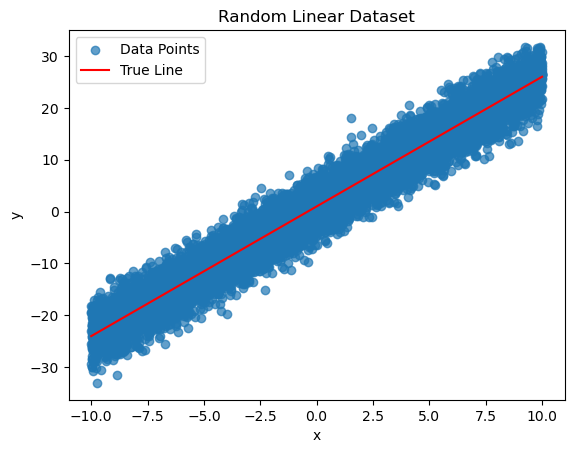

In [2]:
# Plot the dataset
plt.scatter(x, y, label='Data Points', alpha=0.7)
plt.plot(np.sort(x), m_original * np.sort(x) + c_original, color='red', label='True Line')
plt.title('Random Linear Dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### 2. Define the Line
A straight line can be written as:

            𝑦 = 𝑚⋅𝑥 + 𝑐                 .

Here:    
𝑚: The slope of the line (how steep it is).  
𝑐: The intercept (where the line crosses the y-axis).

The task is to figure out the best values for 𝑚 and 𝑐.

In [3]:
# Generate random values for m and c
m = np.random.uniform(-10, 10)  # Random slope in the range [-10, 10]
c = np.random.uniform(-10, 10)  # Random intercept in the range [-10, 10]
print("slope:",m,"\nIntercept:",c)

slope: -0.22074819018804526 
Intercept: -1.3266608479733026


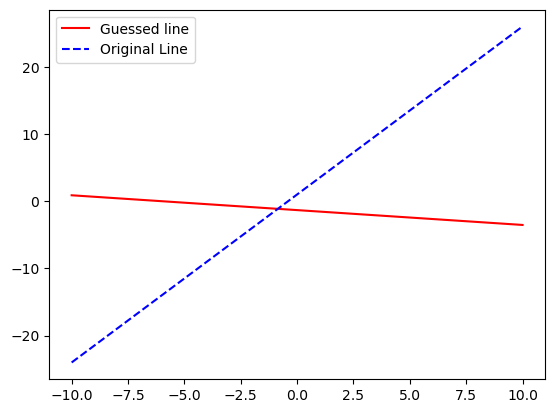

In [4]:
# Plot original and predicted graph to look at the difference
plt.plot(np.sort(x), m*np.sort(x)+c, 'r', label='Guessed line')
plt.plot(np.sort(x), m_original*np.sort(x) + c_original, 'b--', label='Original Line')
plt.legend()


### 3. Find the derivative of the loss function (Gradient):

The gradient is just the derivative of the loss function (Mean-Squared-Error) with respect to a paramter, In our case the gradient is calculated with respect to the slope and with respect to the intercept


In [5]:
# Step 3: Compute gradients
gradient_slope = 0.0
gradient_intercept = 0.0

for x_true, y_true in zip(x, y):
    gradient_slope += (y_true - (m * x_true + c)) * x_true
    gradient_intercept += (y_true - (m * x_true + c))

# Average over all data points
gradient_slope *= (-2 / num_points)
gradient_intercept *= (-2 / num_points)

print(f"Gradient w.r.t. slope: {gradient_slope}")
print(f"Gradient w.r.t. intercept: {gradient_intercept}")


Gradient w.r.t. slope: -184.55484386763794
Gradient w.r.t. intercept: -4.992358108027918


### 4. Calculate the step size and update the values of slope and intercept

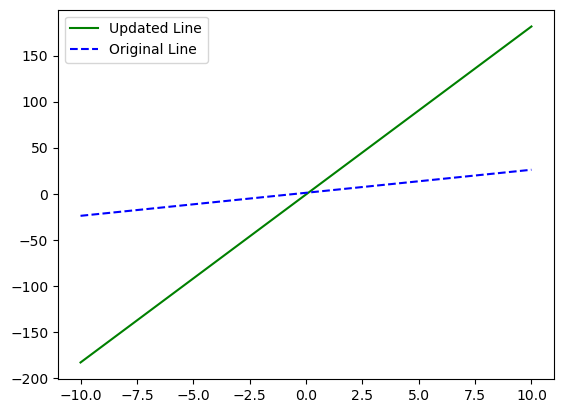

Updated values -> Slope: 18.234736196575753, Intercept: -0.8274250371705109


In [6]:

# Step 4: Update parameters using gradient descent
learning_rate = 0.1
m -= learning_rate * gradient_slope
c -= learning_rate * gradient_intercept

# Plot updated line
plt.plot(np.sort(x), m * np.sort(x) + c, 'g', label='Updated Line')
plt.plot(np.sort(x), m_original * np.sort(x) + c_original, 'b--', label='Original Line')
plt.legend()
plt.show()

print(f"Updated values -> Slope: {m}, Intercept: {c}")


### 5. Keep repeating the adjustment process until one of these happens:

The changes to 
𝑚 and 𝑐 become very tiny (meaning the line is almost perfect).                     
You hit a limit for how many tries you allow (e.g., 1000 times).

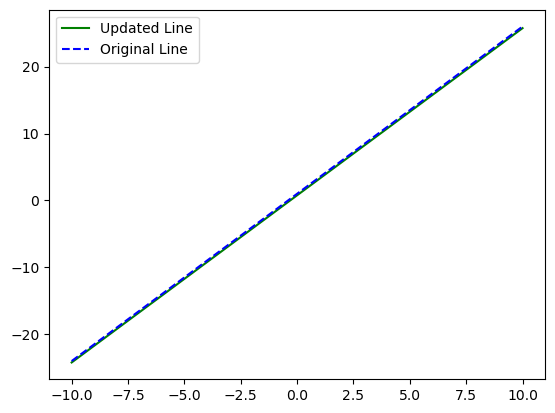

In [7]:
# Repeat steps 3 and 4
epochs = 10
learning_rate = 0.1
for _ in range(epochs):
    for x_true, y_true in zip(x, y):
        # Step 3: Compute the loss
        gradient_slope = 0.0
        gradient_intercept = 0.0
        gradient_slope += (y_true - (m * x_true + c)) * x_true
        gradient_intercept += (y_true - (m * x_true + c))

        # Average over all data points
        gradient_slope *= (-2 / num_points)
        gradient_intercept *= (-2 / num_points)

        # Step 4: Update the parameters
        m -= learning_rate * gradient_slope
        c -= learning_rate * gradient_intercept

# Plot updated line
plt.plot(np.sort(x), m * np.sort(x) + c, 'g', label='Updated Line')
plt.plot(np.sort(x), m_original * np.sort(x) + c_original, 'b--', label='Original Line')
plt.legend()
plt.show()